With IFO0880_jsb and NP11 model make simulations with three different growth rates (see table below) and knock-out either XPK or ACITL and none for the control. There's no glc uptake data yet, use glc max. Then constrain also the glc rates and optimize for NGAM min. Make the usual graphs and tables, all fluxes file, and escher map.

	           Control	  XPK∆	     ACL∆
GR	           0,313	  0,269	     0,184 (lab data)
Glucose uptake 4.146102 3.567386   2.458913 (simulated values Rt_jsb)	
                [3.893592, 3.368067, 2.331876 NP11]	

In [40]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
# os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
# import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt
from cobra.flux_analysis.loopless import loopless_solution


IFO0880_jsb

In [41]:
# Biomass max

rt_jsb_model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")
rt_jsb_model1.objective = "EX_glc__D_e" 

solution1 = rt_jsb_model1.optimize()
all_fluxes = solution1.fluxes.to_frame(name='Flux')


knock_outs = ['Control', 'XPK knock-out', 'ACITL knock-out']
growth_rates = [0.313, 0.269, 0.184]

# Get all fluxes on different knock-outs
all_fluxes_dif_knock_outs = pd.DataFrame(columns=[ 'Growth rate','Glucose uptake', *all_fluxes.index], index=knock_outs) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(growth_rates)):

    rt_jsb_model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")

    rt_jsb_model.objective = "EX_glc__D_e" 
    rt_jsb_model.reactions.EX_glc__D_e.bounds = -9999, 9999
    rt_jsb_model.reactions.BIOMASS_RT.bounds = growth_rates[i], growth_rates[i]
    if i == 1:
        rt_jsb_model.reactions.XPK.bounds = 0, 0
    elif i == 2:
        rt_jsb_model.reactions.ACITL.bounds = 0, 0     

    rt_jsb_solution = rt_jsb_model.optimize()
    rt_jsb_solution = loopless_solution(rt_jsb_model)
    
    all_fluxes_dif_knock_outs.loc[knock_outs[i]] = rt_jsb_solution.fluxes[[ 'BIOMASS_RT','EX_glc__D_e', *all_fluxes.index]].values

all_fluxes_dif_knock_outs


,Growth rate,Glucose uptake,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,...,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2,tr_0001,EXC_OUT_phyto_d,MDHc
Control,0.313,-4.146102,0.0,0.0,0.0,0.0,0.0,0.0,-0.000552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.829603
XPK knock-out,0.269,-3.567386,0.0,0.0,0.0,0.0,0.0,0.0,-0.000475,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.572407
ACITL knock-out,0.184,-2.458913,0.0,0.0,0.0,0.0,0.0,0.0,-0.000325,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.087453


In [43]:
# Simulations with ATPM min

rt_jsb_model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")
rt_jsb_model1.objective = "ATPM" 

solution1 = rt_jsb_model1.optimize('minimize')
all_fluxes = solution1.fluxes.to_frame(name='Flux')


knock_outs = ['Control', 'XPK knock-out', 'ACITL knock-out']
growth_rates = [0.313, 0.269, 0.184] 
glucose_uptakes = [4.1461029, 3.5673869, 2.4589139] #all_fluxes_dif_knock_outs['EX_glc__D_e'] #

# Get all fluxes on different knock-outs
all_fluxes_dif_knock_outs = pd.DataFrame(columns=[ 'Growth rate','Glucose uptake', *all_fluxes.index], index=knock_outs) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(growth_rates)):

    rt_jsb_model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")

    rt_jsb_model.objective = "ATPM" 
    rt_jsb_model.reactions.EX_glc__D_e.bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i])
    rt_jsb_model.reactions.BIOMASS_RT.bounds = growth_rates[i], growth_rates[i]
    if i == 1:
        rt_jsb_model.reactions.XPK.bounds = 0, 0
    elif i == 2:
        rt_jsb_model.reactions.ACITL.bounds = 0, 0     

    rt_jsb_solution = rt_jsb_model.optimize('minimize')
    rt_jsb_solution = loopless_solution(rt_jsb_model)
    
    all_fluxes_dif_knock_outs.loc[knock_outs[i]] = rt_jsb_solution.fluxes[[ 'BIOMASS_RT','EX_glc__D_e', *all_fluxes.index]].values

all_fluxes_dif_knock_outs

,Growth rate,Glucose uptake,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,...,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2,tr_0001,EXC_OUT_phyto_d,MDHc
Control,0.313,-4.146103,0.0,0.0,0.0,0.0,0.0,0.0,-0.000552,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.829603
XPK knock-out,0.269,-3.567387,0.0,0.0,0.0,0.0,0.0,0.0,-0.000475,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.572407
ACITL knock-out,0.184,-2.458914,0.0,0.0,0.0,0.0,0.0,0.0,-0.000325,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.087453


In [61]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = all_fluxes_dif_knock_outs[['BIOMASS_RT', 'EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']]

for i in range(len(exchange_fluxes_table.columns)):
    exchange_fluxes_table = exchange_fluxes_table.rename(columns = {exchange_fluxes_table.columns[i]: getattr(rt_jsb_model1.reactions, exchange_fluxes_table.columns[i]).name}) #

exchange_fluxes_table

,Biomass,D-Glucose exchange,O2 exchange,Ammonia exchange,Sulfate exchange,Phosphate exchange,CO2 exchange
Control,0.313,-4.146103,-9.037353,-2.065892,-0.031374,-0.083325,10.21061
XPK knock-out,0.269,-3.567387,-7.791663,-1.775479,-0.026964,-0.071612,8.799989
ACITL knock-out,0.184,-2.458914,-5.442222,-1.214454,-0.018444,-0.048984,6.131932


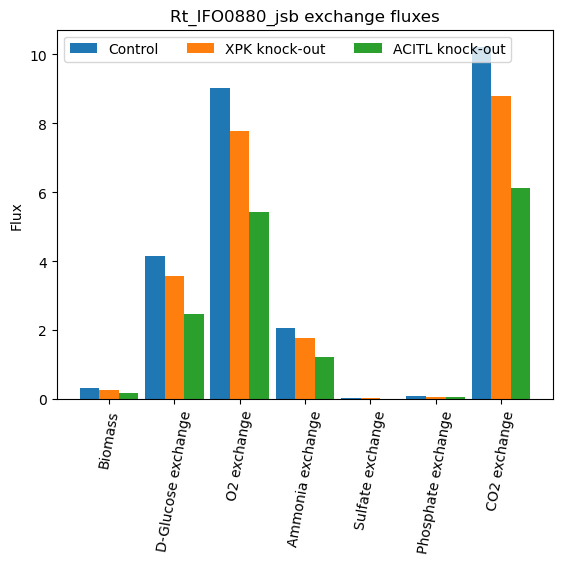

In [62]:
# Exchange fluxes plot
metabolites = exchange_fluxes_table.columns
metabolites_fluxes = {
    'Control': abs(exchange_fluxes_table.loc['Control', :]),
    'XPK knock-out': abs(exchange_fluxes_table.loc['XPK knock-out', :]),
    'ACITL knock-out': abs(exchange_fluxes_table.loc['ACITL knock-out', :]),
}

x = np.arange(len(metabolites))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots() #layout='constrained'

for name, fluxes in metabolites_fluxes.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, fluxes, width, label=name)
    # ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Flux')
ax.set_title('Rt_IFO0880_jsb exchange fluxes')
ax.set_xticks(x + width, metabolites, rotation=80)
ax.legend(loc='upper left', ncols=3)

plt.show()



# for i in range(len(knock_outs)):
#     plt.plot(exchange_fluxes_table.columns, np.abs(exchange_fluxes_table.iloc[i, :]), 'o--', label = knock_outs[i])

# # plt.xlabel('Reactions')
# plt.ylabel('Flux')
# plt.title("Rt_IFO0880_jsb exchange fluxes")
# plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.xticks(range(0, 7, 1), rotation=80)
# plt.yticks(range(0, 11, 1))
# plt.show()


In [68]:
intracellular_fluxes = all_fluxes_dif_knock_outs[['BIOMASS_RT', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'PYRDC','PDHm', 'FBA','XPK', 'ACITL', 'ATPM']]

if 'XPK' in intracellular_fluxes.columns:
    intracellular_fluxes.loc[:, 'XPK'] = intracellular_fluxes.loc[:, 'XPK'] + all_fluxes_dif_knock_outs.loc[:, 'FPK']

for i in range(len(intracellular_fluxes.columns)):
    intracellular_fluxes = intracellular_fluxes.rename(columns = {intracellular_fluxes.columns[i]: getattr(rt_jsb_model1.reactions, intracellular_fluxes.columns[i]).name})

intracellular_fluxes = intracellular_fluxes.rename(columns = {'Glucose 6-phosphate dehydrogenase': 'oxpp', 'Xylulose-5-phosphate phosphoketolase': 'Phosphoketolase', 'ATP maintenance requirement': 'NGAM'})

intracellular_fluxes

,Biomass,D-Glucose exchange,oxpp,Transketolase,Transaldolase,Transketolase,Pyruvate decarboxylase,Pyruvate dehydrogenase,Fructose-bisphosphate aldolase,Phosphoketolase,ATP-Citrate lyase,NGAM
Control,0.313,-4.146103,0.41741,-0.009483,-0.009483,-0.068067,0.28765,4.345338,2.855097,0.0,1.680838,1.220022
XPK knock-out,0.269,-3.567387,0.353785,-0.009799,-0.009799,-0.060148,0.247213,3.744386,2.459513,0.0,1.444554,1.220024
ACITL knock-out,0.184,-2.458914,0.021853,-0.409449,-0.409449,0.0,0.169097,2.013402,1.115761,0.988097,0.0,1.220034


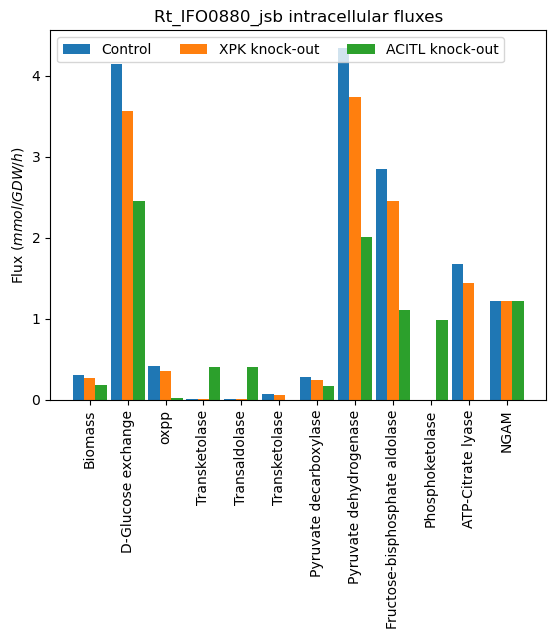

In [70]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis
metabolites = intracellular_fluxes.columns
metabolites_fluxes = {
    'Control': abs(intracellular_fluxes.loc['Control', :]),
    'XPK knock-out': abs(intracellular_fluxes.loc['XPK knock-out', :]),
    'ACITL knock-out': abs(intracellular_fluxes.loc['ACITL knock-out', :]),
}

x = np.arange(len(metabolites))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots() #layout='constrained'

for name, fluxes in metabolites_fluxes.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, fluxes, width, label=name)
    # ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Flux ($mmol/GDW/h$)')
ax.set_title('Rt_IFO0880_jsb intracellular fluxes')
ax.set_xticks(x + width, metabolites, rotation=90)
ax.legend(loc='upper left', ncols=3)

plt.show()




# GR_range = all_fluxes_dif_knock_outs['BIOMASS_RT']
# # Sample data
# x = GR_range
# y1 = np.abs(ATPM_ACITL_fluxes[['ATPM', 'ACITL']])
# y2 = np.abs(intracellular_fluxes[['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm', 'FPK', 'FBA']])

# # Plot the PPP enzymes fluxes with ATPM and ACITL 


# y = np.abs(all_fluxes_dif_knock_outs[['BIOMASS_RT', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm', 'FPK', 'ATPM', 'ACITL']])

# for i in range(len(knock_outs)):
#     plt.plot(['BIOMASS_RT', 'oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm', 'FPK', 'ATPM', 'ACITL'], y.iloc[i, :], 'o--', label = knock_outs[i])

# # plt.xlabel('Reactions')
# plt.ylabel('Flux')
# plt.title("Rt_IFO0880_jsb intracellular fluxes")
# plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.xticks(rotation=80)
# # plt.yticks(range(0, 4))
# plt.show()

In [26]:
# # Get all fluxes to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Knock-outs\\Rt_IFO0880_jsb_all_fluxes_knock_outs.xlsx') as excel_writer:
#     all_fluxes_dif_knock_outs.to_excel(excel_writer, sheet_name='Sheet1', index=True)

In [27]:
# # Get csv files
# for i in range(len(knock_outs)):
#     all_fluxes_dif_knock_outs.iloc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Knock-outs\\Rt_IFO0880_jsb_all_fluxes_{knock_outs[i]}.csv', index=True)


NP11

In [9]:
# Importing the model, calculating glc uptakes

NP11_model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")
NP11_model1.objective = "r_1714"  #glc

solution1 = NP11_model1.optimize()
all_fluxes = solution1.fluxes.to_frame(name='Flux')


knock_outs = ['Control', 'XPK knock-out', 'ACITL knock-out']
growth_rates = [0.313, 0.269, 0.184]

# Get all fluxes on different knock-outs
all_fluxes_dif_knock_outs = pd.DataFrame(columns=[ 'Growth rate', 'Glucose uptake', *all_fluxes.index], index=knock_outs) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(growth_rates)):

    NP11_model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")

    NP11_model.objective = "r_1714" 
    NP11_model.reactions.r_1714.bounds = -9999, 9999
    NP11_model.reactions.r_4041.bounds = growth_rates[i], growth_rates[i]
    if i == 1:
        NP11_model.reactions.t_0081.bounds = 0, 0
    elif i == 2:
        NP11_model.reactions.y200003.bounds = 0, 0     

    NP11_model_solution = NP11_model.optimize()
    NP11_model_solution = loopless_solution(NP11_model)
    
    all_fluxes_dif_knock_outs.loc[knock_outs[i]] = NP11_model_solution.fluxes[[  'r_4041','r_1714', *all_fluxes.index]].values

all_fluxes_dif_knock_outs


,Growth rate,Glucose uptake,r_0001,r_0002,r_0003,r_0004,r_0005,r_0006,r_0007,r_0012,...,y300064,y300065,y300066,y300068,y300069,y300070,y300072,y300074,y300075,y300078
Control,0.313,-3.893592,0.0,0.0,0.0,0.0,0.337522,0.11274,0.016954,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XPK knock-out,0.269,-3.368067,0.0,0.0,0.0,0.0,0.290075,0.096891,0.014571,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACITL knock-out,0.184,-2.331876,0.0,0.0,0.0,0.0,0.198416,0.066275,0.009967,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# NGAM min

NP11_model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")
NP11_model1.objective = 'r_4046' # NGAM

solution1 = NP11_model1.optimize('minimize')
all_fluxes = solution1.fluxes.to_frame(name='Flux')


knock_outs = ['Control', 'XPK knock-out', 'ACITL knock-out']
growth_rates = [0.313, 0.269, 0.184]
glucose_uptakes = [3.893592, 3.368067, 2.331876]

# Get all fluxes on different knock-outs
all_fluxes_dif_knock_outs = pd.DataFrame(columns=[ 'Growth rate', 'Glucose uptake', *all_fluxes.index], index=knock_outs) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(growth_rates)):

    NP11_model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")

    NP11_model.objective = 'r_4046' # NGAM
    NP11_model.reactions.r_1714.bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i])
    NP11_model.reactions.r_4041.bounds = growth_rates[i], growth_rates[i]
    if i == 1:
        NP11_model.reactions.t_0081.bounds = 0, 0  #XPK
    elif i == 2:
        NP11_model.reactions.y200003.bounds = 0, 0 # ACITL    

    NP11_model_solution = NP11_model.optimize('minimize')
    NP11_model_solution = loopless_solution(NP11_model)

    
    all_fluxes_dif_knock_outs.loc[knock_outs[i]] = NP11_model_solution.fluxes[[ 'r_4041','r_1714', *all_fluxes.index]].values

all_fluxes_dif_knock_outs

,Growth rate,Glucose uptake,r_0001,r_0002,r_0003,r_0004,r_0005,r_0006,r_0007,r_0012,...,y300064,y300065,y300066,y300068,y300069,y300070,y300072,y300074,y300075,y300078
Control,0.313,-3.893592,0.0,0.0,0.0,0.0,0.337522,0.11274,0.016954,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XPK knock-out,0.269,-3.368067,0.0,0.0,0.0,0.0,0.290075,0.096891,0.014571,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACITL knock-out,0.184,-2.331876,0.0,0.0,0.0,0.0,0.198416,0.066275,0.009967,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# Exchange fluxes
exchange_fluxes_table = all_fluxes_dif_knock_outs[['r_4041', 'r_1714', 'r_1992', 'r_1654','r_2060','r_2005', 'r_1672']]

for i in range(len(exchange_fluxes_table.columns)):
    exchange_fluxes_table = exchange_fluxes_table.rename(columns = {exchange_fluxes_table.columns[i]: getattr(NP11_model1.reactions, exchange_fluxes_table.columns[i]).name[:-8]}) #

exchange_fluxes_table = exchange_fluxes_table.rename(columns = {'biomass pseudo': 'growth rate'})

exchange_fluxes_table

,growth rate,D-glucose,oxygen,ammonium,sulphate,phosphate,carbon dioxide
Control,0.313,-3.893592,-9.417602,-1.286274,-0.026608,-0.068764,10.441126
XPK knock-out,0.269,-3.368067,-8.224608,-1.105457,-0.022867,-0.059098,9.104253
ACITL knock-out,0.184,-2.331876,-5.79417,-0.756148,-0.015642,-0.040424,6.39586


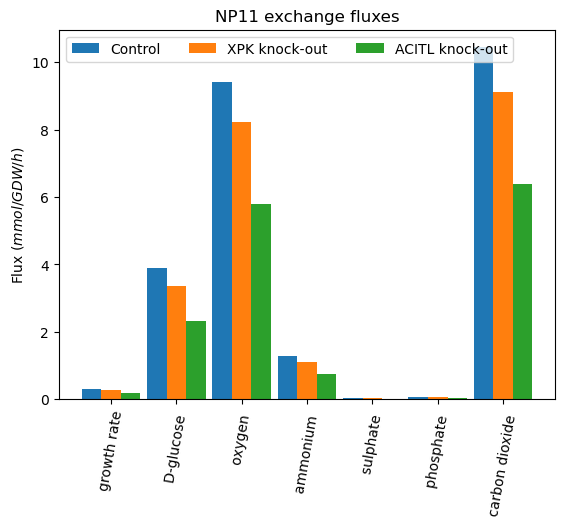

In [39]:
# Exchange fluxes plot

metabolites = exchange_fluxes_table.columns
metabolites_fluxes = {
    'Control': abs(exchange_fluxes_table.loc['Control', :]),
    'XPK knock-out': abs(exchange_fluxes_table.loc['XPK knock-out', :]),
    'ACITL knock-out': abs(exchange_fluxes_table.loc['ACITL knock-out', :]),
}

x = np.arange(len(metabolites))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots() #layout='constrained'

for name, fluxes in metabolites_fluxes.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, fluxes, width, label=name)
    # ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Flux ($mmol/GDW/h$)')
ax.set_title('NP11 exchange fluxes')
ax.set_xticks(x + width, metabolites, rotation=80)
ax.legend(loc='upper left', ncols=3)

plt.show()



# for i in range(len(knock_outs)):
#     plt.plot(exchange_fluxes_table.columns, np.abs(exchange_fluxes_table.iloc[i, :]), 'o--', label = knock_outs[i])

# # plt.xlabel('Reactions')
# plt.ylabel('Flux')
# plt.title("NP11 exchange fluxes")
# plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.xticks(range(0, 7, 1), rotation=80)
# plt.yticks(range(0, 11, 1))
# plt.show()

In [74]:
intracellular_fluxes = all_fluxes_dif_knock_outs[['r_4041', 'r_1714', 'r_0466', 'r_1049', 'r_1048','r_1050', 'r_0959', 'r_0961', 'r_0450','t_0081', 'y200003', 'r_4046']]
# Change G6PDH2rp column name to oxpp 

for i in range(len(intracellular_fluxes.columns)):
    intracellular_fluxes = intracellular_fluxes.rename(columns = {intracellular_fluxes.columns[i]: getattr(NP11_model1.reactions, intracellular_fluxes.columns[i]).name})

intracellular_fluxes = intracellular_fluxes.rename(columns = {'glucose 6-phosphate dehydrogenase': 'oxpp', 'non-growth associated maintenance reaction': 'NGAM', 'biomass pseudoreaction': 'growth rate'})

intracellular_fluxes

,growth rate,D-glucose exchange,oxpp,transketolase 1,transaldolase,transketolase 2,pyruvate decarboxylase,pyruvate dehydrogenase,fructose-bisphosphate aldolase,phosphoketolase,ATP-citrate lyase,NGAM
Control,0.313,-3.893592,1.834322,0.425493,0.0,0.372515,0.618538,2.803173,1.416839,0.522881,0.0,3.392895
XPK knock-out,0.269,-3.368067,1.570178,0.513377,0.0,0.467846,0.565831,2.70761,1.393466,0.0,0.415134,3.392804
ACITL knock-out,0.184,-2.331876,1.078345,0.250131,0.0,0.218988,0.363595,1.733886,0.875875,0.307399,0.0,3.392828


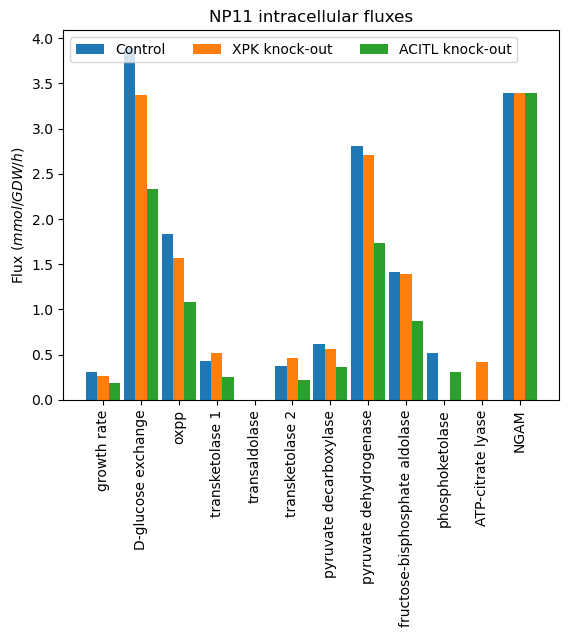

In [76]:
# Plot the PPP enzymes fluxes with ATPM and ACITL 

metabolites = intracellular_fluxes.columns
metabolites_fluxes = {
    'Control': abs(intracellular_fluxes.loc['Control', :]),
    'XPK knock-out': abs(intracellular_fluxes.loc['XPK knock-out', :]),
    'ACITL knock-out': abs(intracellular_fluxes.loc['ACITL knock-out', :]),
}

x = np.arange(len(metabolites))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots() #layout='constrained'

for name, fluxes in metabolites_fluxes.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, fluxes, width, label=name)
    # ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Flux ($mmol/GDW/h$)')
ax.set_title('NP11 intracellular fluxes')
ax.set_xticks(x + width, metabolites, rotation=90)
ax.legend(loc='upper left', ncols=3)

plt.show()

# y = np.abs(all_fluxes_dif_knock_outs[['r_4041', 'r_0466', 'r_1049', 'r_1048','r_1050', 't_0081', 'r_0959', 'r_0961', 'r_0450', 'r_4046', 'y200003']])

# for i in range(len(knock_outs)):
#     plt.plot(['growth rate', 'oxpp',	'transketolase 1',	'transaldolase',	'transketolase 2',	'phosphoketolase',	'pyruvate decarboxylase',	'pyruvate dehydrogenase',	'fructose-bisphosphate aldolase', 'NGAM', 'ATP-citrate lyase'], y.iloc[i, :], 'o--', label = knock_outs[i])

# # plt.xlabel('Reactions')
# plt.ylabel('Flux')
# plt.title("NP11 intracellular fluxes")
# plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.xticks(rotation=90)
# # plt.yticks(range(0, 4))
# plt.show()


In [35]:
# # # Get all fluxes to excel

# with pd.ExcelWriter(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Knock-outs\\NP11_all_fluxes_knock_outs.xlsx') as excel_writer:
#     all_fluxes_dif_knock_outs.to_excel(excel_writer, sheet_name='Sheet1', index=True)

# # Get csv files
# for i in range(len(knock_outs)):
#     all_fluxes_dif_knock_outs.iloc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Knock-outs\\NP11_all_fluxes_{knock_outs[i]}.csv', index=True)
